In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_data_file = './data/training_data_clean.csv'
validation_data_file = './data/validation_data.csv'
train_data = pd.read_csv(training_data_file)
valid_data = pd.read_csv(validation_data_file)
all_data = pd.concat([train_data,valid_data], ignore_index=True)

In [3]:
all_price  = all_data['price']

In [4]:
all_data[['price','temp_air','demand','pv_power']].describe()

,price,temp_air,demand,pv_power
count,87992.000000,87992.000000,87990.000000,87992.000000
mean,80.860993,15.781913,1258.284218,2.377700
std,397.285795,4.900436,413.479452,3.549694
min,-998.999920,3.200000,-44.560000,0.000000
25%,0.017925,12.300000,1102.042500,0.000000
50%,57.478495,15.000000,1321.455000,0.000000
75%,115.293103,18.600000,1496.545000,4.029000
max,16600.000000,39.900000,2562.950000,11.847000


In [31]:
#-1000 to 16600
gap = 100
price_buckets = dict()
for price in all_data['price']:
    for i in range(-1000,16700,gap):
        #key = f"{i}~{i+gap}"
        key = i
        if price >= i and price <i+gap:
            if price_buckets.get(key) is None:
                price_buckets[key] = 1
            else:
                price_buckets[key] += 1
price_buckets = sorted(price_buckets.items())
x = []
y = []
for i in price_buckets:
    x.append(i[0])
    y.append(i[1])

[21,
 1,
 5,
 16,
 158,
 22,
 679,
 20353,
 40148,
 18255,
 4845,
 2864,
 175,
 147,
 23,
 5,
 6,
 87,
 33,
 1,
 2,
 2,
 2,
 1,
 3,
 1,
 59,
 1,
 1,
 30,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 10,
 2,
 1,
 2,
 1,
 4,
 1,
 5,
 8]

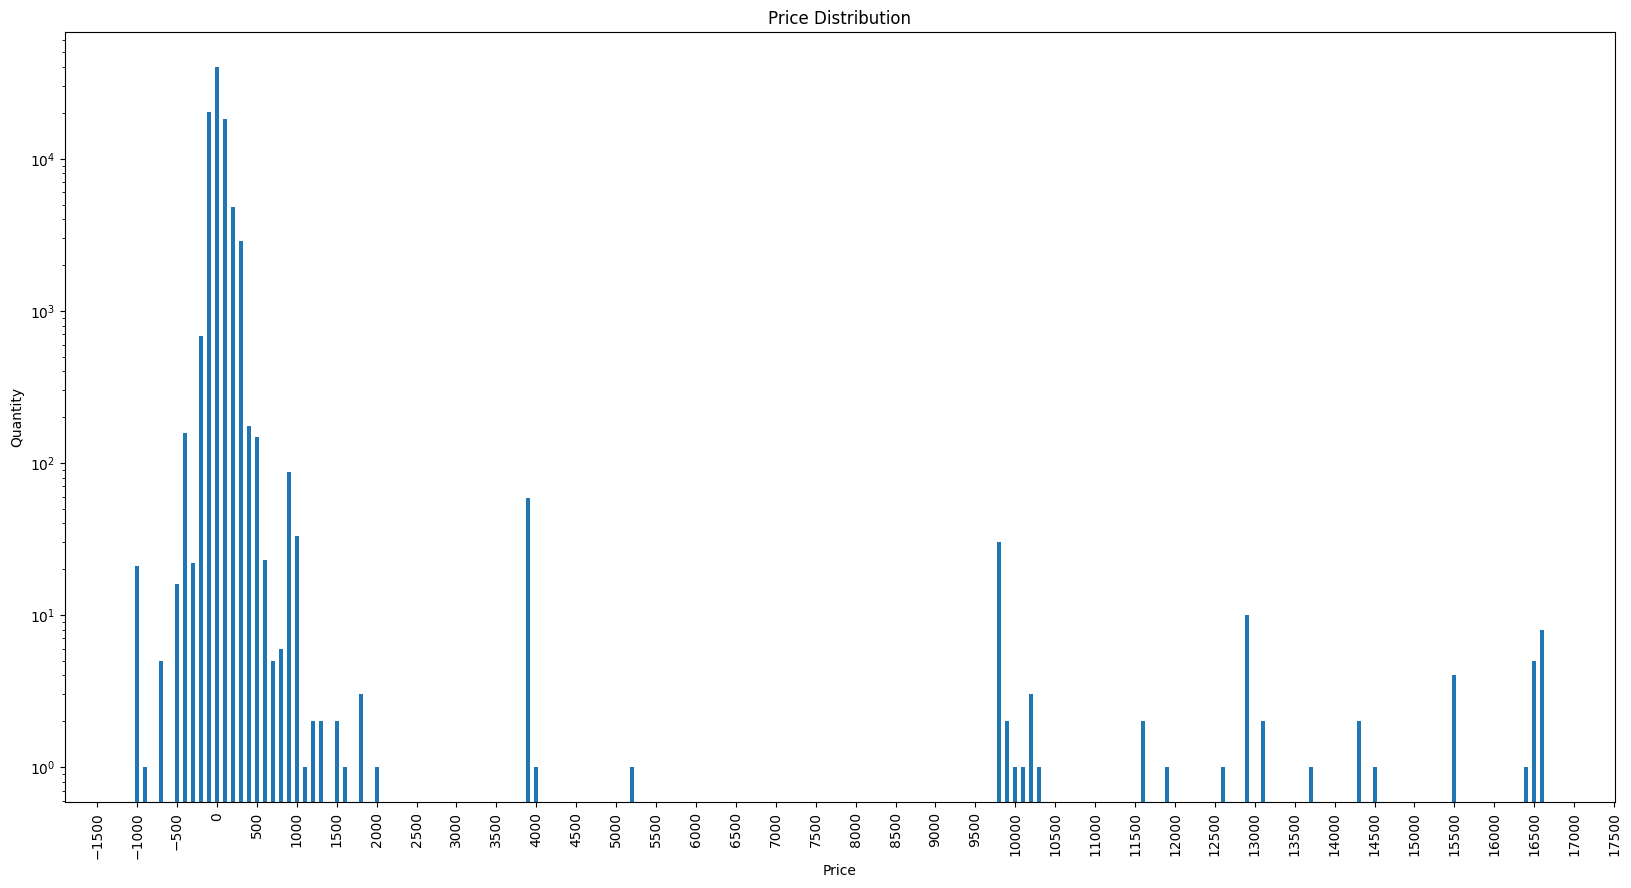

In [51]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
fig, ax = plt.subplots(1, 1, figsize=(20,10))

ax.bar(x,y,width=50)
space = 500
ax.xaxis.set_major_locator(ticker.MultipleLocator(space)) 
#plt.ylim(0,200)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title("Price Distribution")
plt.ylabel("Quantity")
plt.xlabel("Price")
#plt.xticks_
plt.show()

In [28]:
price_buckets

[(-1000, 21),
 (-900, 1),
 (-700, 5),
 (-500, 16),
 (-400, 158),
 (-300, 22),
 (-200, 679),
 (-100, 20353),
 (0, 40148),
 (100, 18255),
 (200, 4845),
 (300, 2864),
 (400, 175),
 (500, 147),
 (600, 23),
 (700, 5),
 (800, 6),
 (900, 87),
 (1000, 33),
 (1100, 1),
 (1200, 2),
 (1300, 2),
 (1500, 2),
 (1600, 1),
 (1800, 3),
 (2000, 1),
 (3900, 59),
 (4000, 1),
 (5200, 1),
 (9800, 30),
 (9900, 2),
 (10000, 1),
 (10100, 1),
 (10200, 3),
 (10300, 1),
 (11600, 2),
 (11900, 1),
 (12600, 1),
 (12900, 10),
 (13100, 2),
 (13700, 1),
 (14300, 2),
 (14500, 1),
 (15500, 4),
 (16400, 1),
 (16500, 5),
 (16600, 8)]

In [5]:
all_price.describe()

count    87992.000000
mean        80.860993
std        397.285795
min       -998.999920
25%          0.017925
50%         57.478495
75%        115.293103
max      16600.000000
Name: price, dtype: float64

In [ ]:
print(f"Price Mean: {all_price.mean()}")
print(f"Price Max: {all_price.max()}")
print(f"Price Min: {all_price.min()}")
print(f"Price Mean: {all_price.mean()}")

In [9]:
ts = train_data['timestamp'][100]
import datetime

date_object = datetime.datetime.strptime(ts, '%Y-%m-%d %H:%M:%S%z')

hr_min = datetime.time(hour=date_object.hour,minute=date_object.minute)
print(hr_min)


08:50:00


In [24]:
train_data.isnull().values.any()

False

In [25]:
valid_data.isnull().values.any()

True

In [29]:
valid_data = valid_data.dropna()

In [30]:
nan_rows = valid_data.isna().any(axis=1)
print(nan_rows[nan_rows==True])

Series([], dtype: bool)


In [4]:
all_data.columns
all_data = all_data.drop(labels=['Unnamed: 0','timestamp'],axis=1)

In [5]:
all_data.min()

price                   -998.99992
demand                   -44.56000
temp_air                   3.20000
pv_power                   0.00000
pv_power_forecast_1h       0.00000
pv_power_forecast_2h       0.00000
pv_power_forecast_24h      0.00000
pv_power_basic             0.00000
dtype: float64

In [6]:
all_data.mean()

price                        80.860993
demand                     1258.284218
temp_air                     15.781913
pv_power                      2.377700
pv_power_forecast_1h          2.434572
pv_power_forecast_2h          2.433435
pv_power_forecast_24h         2.431972
pv_power_basic           340303.160998
dtype: float64

In [7]:
print(all_data.max())

price                    1.660000e+04
demand                   2.562950e+03
temp_air                 3.990000e+01
pv_power                 1.184700e+01
pv_power_forecast_1h     1.179600e+01
pv_power_forecast_2h     1.177500e+01
pv_power_forecast_24h    1.179600e+01
pv_power_basic           1.782623e+06
dtype: float64


In [8]:
all_data.std()

price                       397.285795
demand                      413.479452
temp_air                      4.900436
pv_power                      3.549694
pv_power_forecast_1h          3.558992
pv_power_forecast_2h          3.532865
pv_power_forecast_24h         3.475096
pv_power_basic           487486.708681
dtype: float64

In [9]:
train_data_clean = train_data.dropna()

In [10]:
#train_data_clean.to_csv('./data/training_data_clean.csv')

In [11]:
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])
valid_data['timestamp'] = pd.to_datetime(valid_data['timestamp'])
train_data = train_data.set_index('timestamp',drop=False)
valid_data = valid_data.set_index('timestamp',drop=False)

# Plotting the Correlation Matrix

In [12]:

def visualise_corr(df,imgtitle):
    import seaborn as sns    
    df = df.drop(columns=['timestamp'])
    # Calculate correlation between numerical columns
    #print("\nCorrelation between numerical columns:")
    correlation_matrix = df.corr()
    #print(correlation_matrix)
    

    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.xticks(rotation=80)  # Rotate x-axis tick labels by 45 degrees
    plt.title(imgtitle+" Feature Correlation Matrix")
    #plt.savefig('corr.png', bbox_inches='tight')
    plt.show()
    plt.close()

In [13]:
train_data.head()

,Unnamed: 0,timestamp,price,demand,temp_air,pv_power,pv_power_forecast_1h,pv_power_forecast_2h,pv_power_forecast_24h,pv_power_basic
timestamp,,,,,,,,,,
2023-03-01 00:30:00+00:00,227358,2023-03-01 00:30:00+00:00,-28.36397,1012.24,19.1,2.916,3.936,3.854,5.909,698999.863625
2023-03-01 00:35:00+00:00,227359,2023-03-01 00:35:00+00:00,-11.00902,1024.27,19.1,2.916,3.936,3.854,5.909,698999.863625
2023-03-01 00:40:00+00:00,227360,2023-03-01 00:40:00+00:00,-8.00477,1000.61,19.1,2.916,3.936,3.854,5.909,698999.863625
2023-03-01 00:45:00+00:00,227361,2023-03-01 00:45:00+00:00,-8.16710,1036.94,19.1,2.916,3.936,3.854,5.909,698999.863625
2023-03-01 00:50:00+00:00,227362,2023-03-01 00:50:00+00:00,-32.14319,983.33,19.1,2.916,3.936,3.854,5.909,698999.863625


In [14]:
valid_data.head()

,timestamp,price,demand,temp_air,pv_power,pv_power_forecast_1h,pv_power_forecast_2h,pv_power_forecast_24h,pv_power_basic
timestamp,,,,,,,,,
2023-11-06 19:35:00+00:00,2023-11-06 19:35:00+00:00,53.00968,1285.85,10.7,0.0,0.026,2.301,0.0,0.0
2023-11-06 19:40:00+00:00,2023-11-06 19:40:00+00:00,49.83478,1326.21,10.7,0.0,0.026,2.301,0.0,0.0
2023-11-06 19:45:00+00:00,2023-11-06 19:45:00+00:00,50.92774,1330.17,10.7,0.0,0.026,2.301,0.0,0.0
2023-11-06 19:50:00+00:00,2023-11-06 19:50:00+00:00,53.12289,1329.21,10.7,0.0,0.026,2.301,0.0,0.0
2023-11-06 19:55:00+00:00,2023-11-06 19:55:00+00:00,40.16026,1345.44,10.7,0.0,0.026,2.301,0.0,0.0


Training Data Price Statistics:
Max: 16600.0
Min: -998.99992
Mean: 88.80700064964556
Std: 394.4052904866622


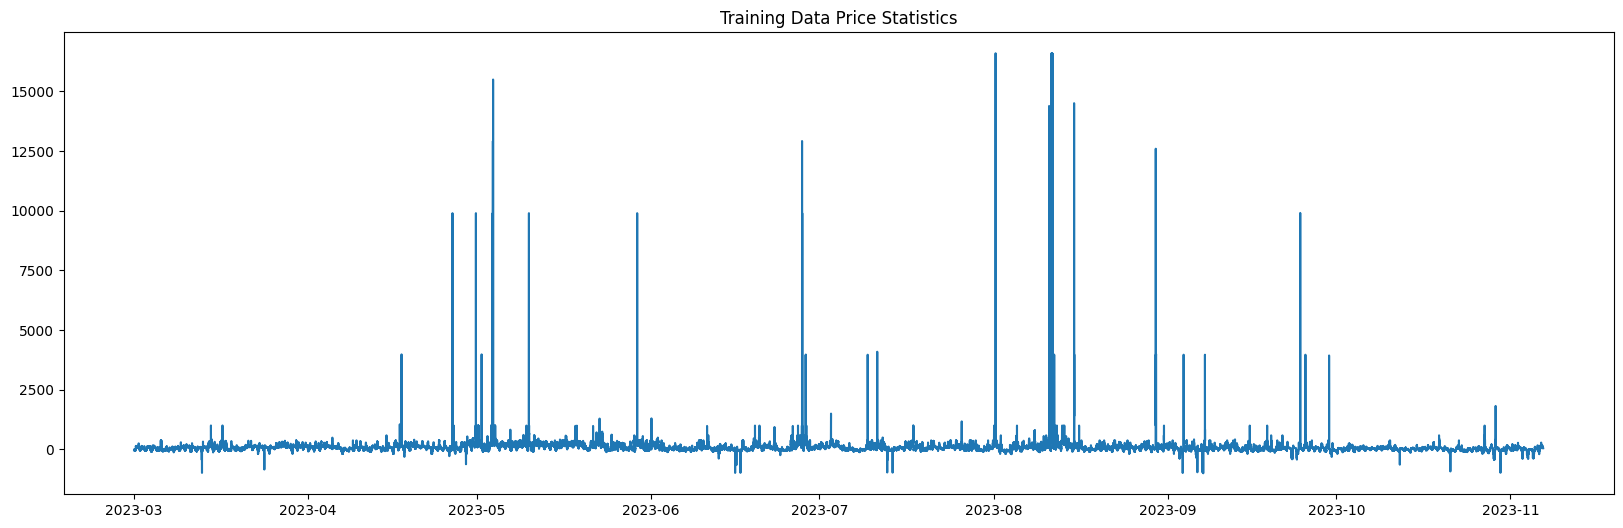

In [15]:
print("Training Data Price Statistics:")
print(f"Max: {train_data['price'].max()}")
print(f"Min: {train_data['price'].min()}")
print(f"Mean: {train_data['price'].mean()}")
print(f"Std: {train_data['price'].std()}")


plt.figure(figsize=(20, 6))
plt.title("Training Data Price Statistics")
plt.plot(train_data['price'])
plt.show()
plt.close()

In [16]:
all_data.columns

Index(['price', 'demand', 'temp_air', 'pv_power', 'pv_power_forecast_1h',
       'pv_power_forecast_2h', 'pv_power_forecast_24h', 'pv_power_basic'],
      dtype='object')

In [67]:
def data_preprocess(in_df):
    '''
    This function is used to preprocess the data read from csv file.
    This function wil map all the features to [0,1]
    The input df is a pandas dataframe with following columns:
    ['price', 'demand', 'temp_air', 'pv_power', 'pv_power_forecast_1h',
    'pv_power_forecast_2h', 'pv_power_forecast_24h', 'pv_power_basic']
    '''
    import copy
    df = copy.deepcopy(in_df)
    price_data = df['price']
    price_min = -600 #define by Derek
    price_max = 1000 #define by Derek
    ##price_min = -1000
    ##price_max = 16600.0
    ##price_log_max = 10
    ##price_log_min = -10
    #to prevent there is any price that is smaller than -1000:
    ##price_data[price_data<-1000] = -1000
    ##price_data = price_data - price_min + 0.0001 #avoid log(0)
    ##price_data = np.log(price_data) #convert to log scale
    ##price_data = (price_data - price_log_min) / (price_log_max - price_log_min)
    price_data[price_data<price_min] = price_min
    price_data[price_data>price_max] = price_max
    price_data = (price_data - price_min) / (price_max-price_min)
    
    df['price'] = price_data


    demand_data = df['demand']
    demand_min = -44.56
    demand_max = 2562.95
    demand_data = (demand_data - demand_min) / (demand_max-demand_min)
    df['demand'] = demand_data

    temp_air_data = df['temp_air']
    temp_air_max = 40
    temp_air_min = 0
    temp_air_data = (temp_air_data - temp_air_min) / (temp_air_max - temp_air_min)
    df['temp_air'] = temp_air_data

    pv_power_data = df['pv_power']
    pv_power_min = 0.0
    pv_power_max = 12
    pv_power_data = (pv_power_data - pv_power_min) / (pv_power_max - pv_power_min)
    df['pv_power'] = pv_power_data

    pv_power_forecast_1h_data = df['pv_power_forecast_1h']
    pv_power_forecast_1h_data = (pv_power_forecast_1h_data - pv_power_min) / (pv_power_max - pv_power_min)
    df['pv_power_forecast_1h'] = pv_power_forecast_1h_data

    pv_power_forecast_2h_data = df['pv_power_forecast_2h']
    pv_power_forecast_2h_data = (pv_power_forecast_2h_data - pv_power_min) / (pv_power_max - pv_power_min)
    df['pv_power_forecast_2h'] = pv_power_forecast_2h_data

    pv_power_forecast_24h_data = df['pv_power_forecast_24h']
    pv_power_forecast_24h_data = (pv_power_forecast_24h_data - pv_power_min) / (pv_power_max - pv_power_min)
    df['pv_power_forecast_24h'] = pv_power_forecast_24h_data
    
    pv_power_basic_data = df['pv_power_basic']
    pv_power_basic_max = 1782623
    pv_power_basic_min = 0
    pv_power_basic_log_max = 15
    pv_power_basic_log_min = -10
    pv_power_basic_data = pv_power_basic_data + 0.0001 #-0
    pv_power_basic_data = np.log(pv_power_basic_data)
    pv_power_basic_data = (pv_power_basic_data - pv_power_basic_log_min) / (pv_power_basic_log_max - pv_power_basic_log_min)
    df['pv_power_basic'] = pv_power_basic_data
    
    return df


In [68]:
norm_all_data = data_preprocess(all_data)

C:\Users\b0350\AppData\Local\Temp\ipykernel_12560\2128971604.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data[price_data<price_min] = price_min
C:\Users\b0350\AppData\Local\Temp\ipykernel_12560\2128971604.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data[price_data>price_max] = price_max


In [57]:
all_data[['price','temp_air','demand','pv_power']].describe()

,price,temp_air,demand,pv_power
count,87992.000000,87992.000000,87990.000000,87992.000000
mean,80.860993,15.781913,1258.284218,2.377700
std,397.285795,4.900436,413.479452,3.549694
min,-998.999920,3.200000,-44.560000,0.000000
25%,0.017925,12.300000,1102.042500,0.000000
50%,57.478495,15.000000,1321.455000,0.000000
75%,115.293103,18.600000,1496.545000,4.029000
max,16600.000000,39.900000,2562.950000,11.847000


In [69]:
norm_all_data[['price','temp_air','demand','pv_power']].describe()

,price,temp_air,demand,pv_power
count,87992.000000,87992.000000,87990.000000,87992.000000
mean,0.418164,0.394548,0.499651,0.198142
std,0.072860,0.122511,0.158573,0.295808
min,0.000000,0.080000,0.000000,0.000000
25%,0.375011,0.307500,0.439731,0.000000
50%,0.410924,0.375000,0.523877,0.000000
75%,0.447058,0.465000,0.591026,0.335750
max,1.000000,0.997500,1.000000,0.987250


: 

In [21]:
norm_all_data.isnull().values.any()

True

In [132]:
print("MIN")
print(norm_all_data.min())
print("\nMAX")
print(norm_all_data.max())
print("\nMEAN")
print(norm_all_data.mean())
print("\nSTD")
print(norm_all_data.std())

MIN
price                    0.500009
demand                   0.000000
temp_air                 0.080000
pv_power                 0.000000
pv_power_forecast_1h     0.000000
pv_power_forecast_2h     0.000000
pv_power_forecast_24h    0.000000
pv_power_basic           0.031586
dtype: float64

MAX
price                    0.988783
demand                   1.000000
temp_air                 0.997500
pv_power                 0.987250
pv_power_forecast_1h     0.983000
pv_power_forecast_2h     0.981250
pv_power_forecast_24h    0.983000
pv_power_basic           0.975744
dtype: float64

MEAN
price                    0.848534
demand                   0.499651
temp_air                 0.394548
pv_power                 0.198142
pv_power_forecast_1h     0.202881
pv_power_forecast_2h     0.202786
pv_power_forecast_24h    0.202664
pv_power_basic           0.477589
dtype: float64

STD
price                    0.007215
demand                   0.158573
temp_air                 0.122511
pv_power         

Training Data log Price Statistics:
Max: 14.393596376916081
Min: -9.210340371976182
Mean: 1.9397362524185224
Std: 10.93375841495653


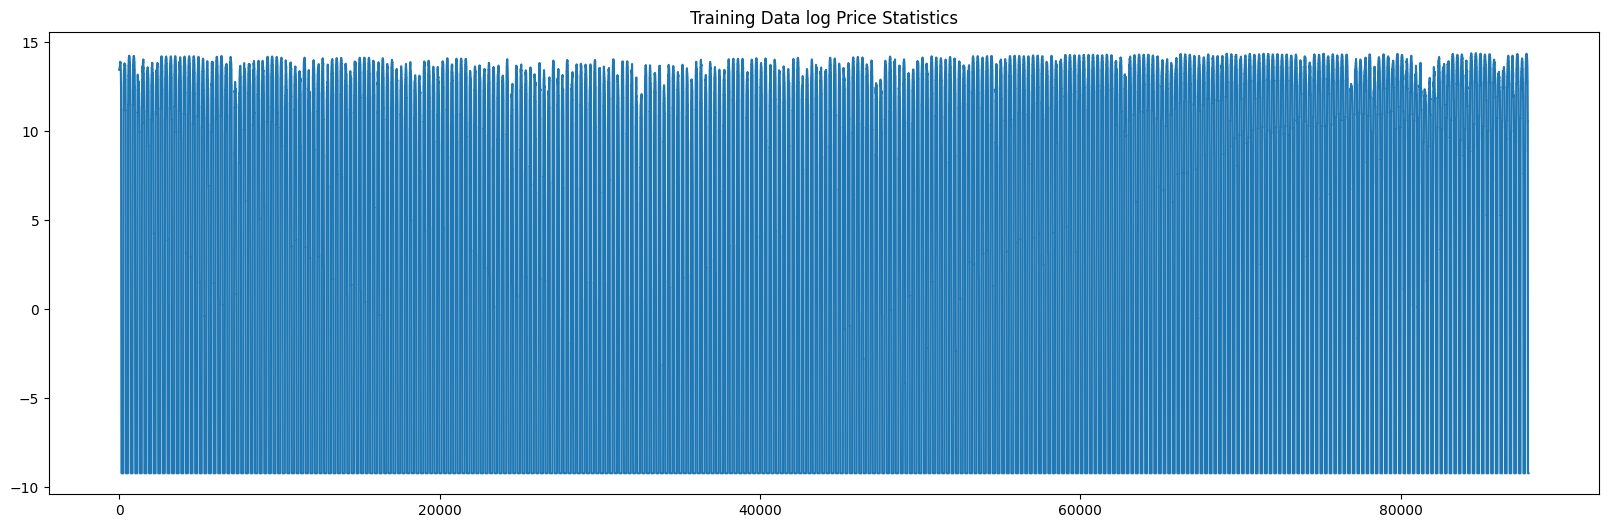

0        13.457406
1        13.457406
2        13.457406
3        13.457406
4        13.457406
           ...    
87987    -9.210340
87988    -9.210340
87989    -9.210340
87990    -9.210340
87991    -9.210340
Name: pv_power_basic, Length: 87992, dtype: float64


In [112]:
import copy
pv_power_basic_data = copy.deepcopy(all_data['pv_power_basic'])
pv_power_basic_data = pv_power_basic_data-pv_power_basic_data.min()+0.0001
pv_power_basic_data = np.log(pv_power_basic_data)
#training_log_prices = (training_log_prices - training_log_prices.min()) / (training_log_prices.max() - training_log_prices.min())
    
print("Training Data log Price Statistics:")
print(f"Max: {pv_power_basic_data.max()}")
print(f"Min: {pv_power_basic_data.min()}")
print(f"Mean: {pv_power_basic_data.mean()}")
print(f"Std: {pv_power_basic_data.std()}")


plt.figure(figsize=(20, 6))
plt.title("Training Data log Price Statistics")
plt.plot(pv_power_basic_data)
plt.show()
plt.close()
print(pv_power_basic_data)

Training Data log Price Statistics:
Max: 9.77559736236664
Min: -9.210340371976182
Mean: 6.969509668429862
Std: 0.1605146484417142


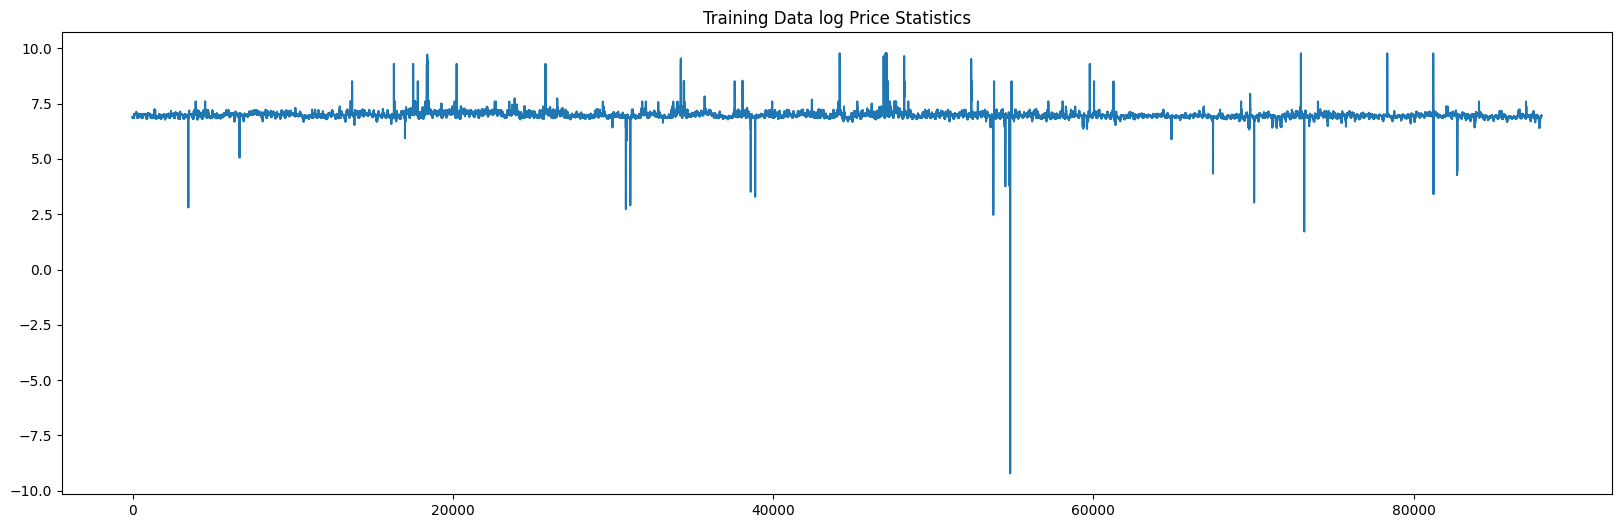

0        6.877952
1        6.895674
2        6.898710
3        6.898546
4        6.874050
           ...   
87987    6.956494
87988    6.957980
87989    6.957974
87990    6.958598
87991    6.957264
Name: price, Length: 87992, dtype: float64


In [111]:
import copy
training_prices = copy.deepcopy(train_data['price'])
training_log_prices = train_data['price']-train_data['price'].min()+0.0001
training_log_prices = np.log(training_log_prices)
#training_log_prices = (training_log_prices - training_log_prices.min()) / (training_log_prices.max() - training_log_prices.min())
    
print("Training Data log Price Statistics:")
print(f"Max: {training_log_prices.max()}")
print(f"Min: {training_log_prices.min()}")
print(f"Mean: {training_log_prices.mean()}")
print(f"Std: {training_log_prices.std()}")


plt.figure(figsize=(20, 6))
plt.title("Training Data log Price Statistics")
plt.plot(training_log_prices)
plt.show()
plt.close()
print(training_log_prices)

Training Data std Price Statistics:
Max: 41.86351805518877
Min: -2.7580941404396104
Mean: -3.777808076704122e-17
Std: 0.9999999999999999


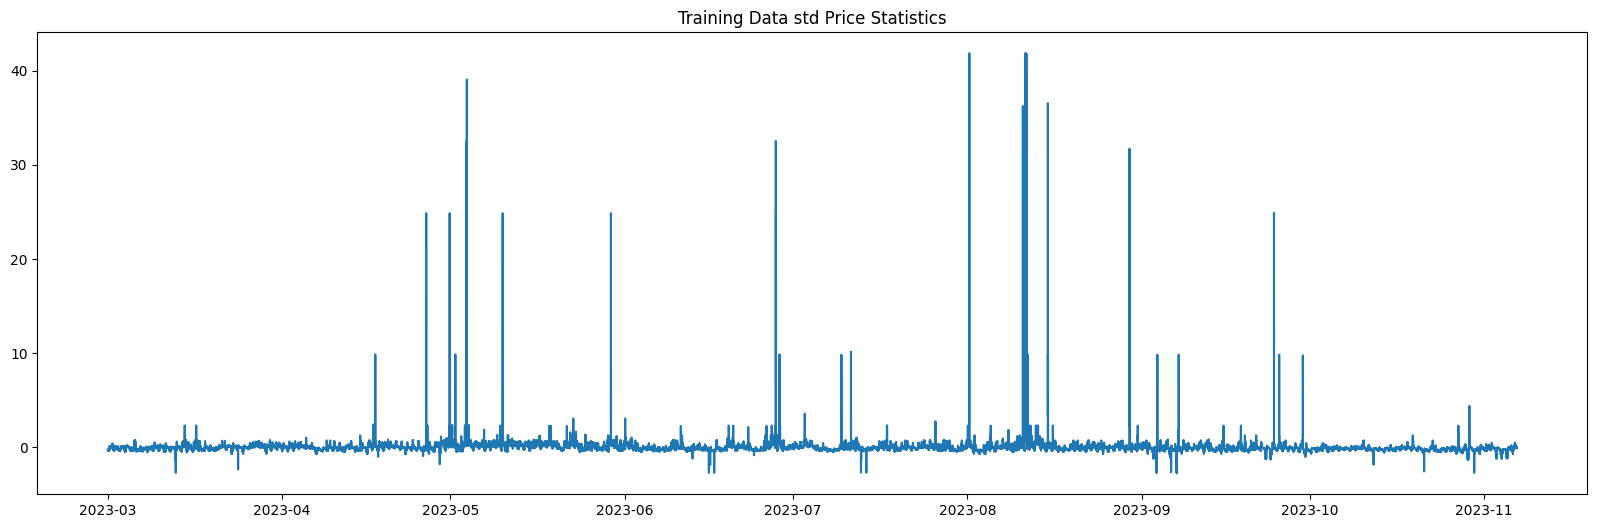

Training Data std log Price Statistics:
Max: 3.7982205610971325
Min: -9.210340371976182
Mean: 0.99910978036212
Std: 0.15347485779201125


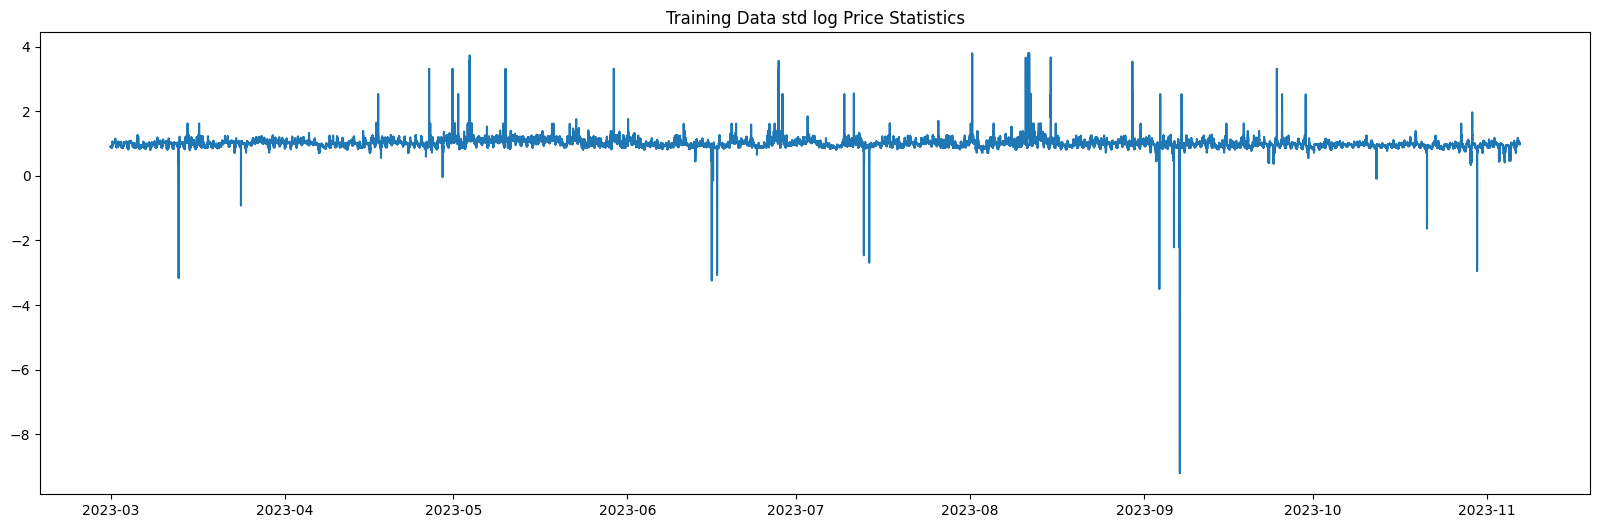

In [68]:
import copy
training_prices = copy.deepcopy(train_data['price'])
training_standardize_prices = (train_data['price']-train_data['price'].mean()) / train_data['price'].std()

print("Training Data std Price Statistics:")
print(f"Max: {training_standardize_prices.max()}")
print(f"Min: {training_standardize_prices.min()}")
print(f"Mean: {training_standardize_prices.mean()}")
print(f"Std: {training_standardize_prices.std()}")


plt.figure(figsize=(20, 6))
plt.title("Training Data std Price Statistics")
plt.plot(training_standardize_prices)
plt.show()
plt.close()


training_standardize_log_prices = training_standardize_prices-training_standardize_prices.min()+0.0001
training_standardize_log_prices = np.log(training_standardize_log_prices)
print("Training Data std log Price Statistics:")
print(f"Max: {training_standardize_log_prices.max()}")
print(f"Min: {training_standardize_log_prices.min()}")
print(f"Mean: {training_standardize_log_prices.mean()}")
print(f"Std: {training_standardize_log_prices.std()}")


plt.figure(figsize=(20, 6))
plt.title("Training Data std log Price Statistics")
plt.plot(training_standardize_log_prices)
plt.show()
plt.close()

Max: 3.7982205610971325
Min: -9.210340371976182
Mean: 0.9991097803621202
Std: 0.15347485779201123


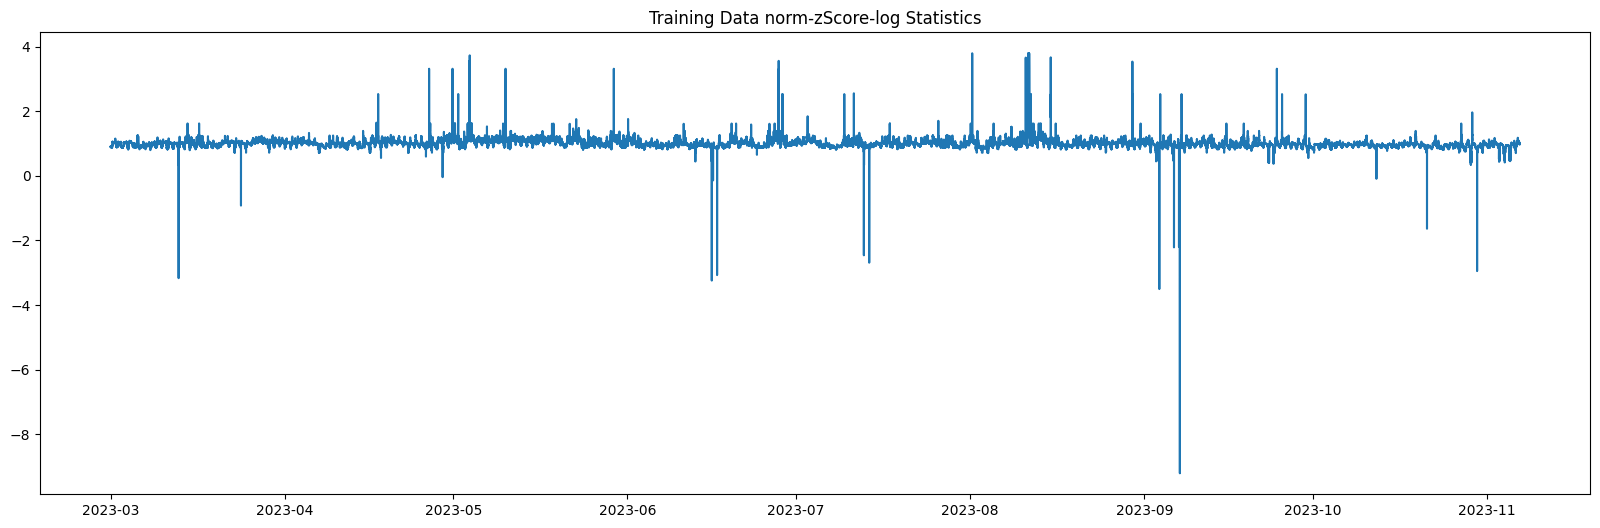

In [72]:
# mean-max --> z-score --> log transform
import copy
training_prices = copy.deepcopy(train_data['price'])
training_prices = (training_prices-training_prices.min()) / (training_prices.max()-training_prices.min())
training_prices = (training_prices-training_prices.mean()) / training_prices.std()
training_prices = training_prices - training_prices.min() + 0.0001
training_prices = np.log(training_prices)


print(f"Max: {training_prices.max()}")
print(f"Min: {training_prices.min()}")
print(f"Mean: {training_prices.mean()}")
print(f"Std: {training_prices.std()}")


plt.figure(figsize=(20, 6))
plt.title("Training Data norm-zScore-log Statistics")
plt.plot(training_prices)
plt.show()
plt.close()



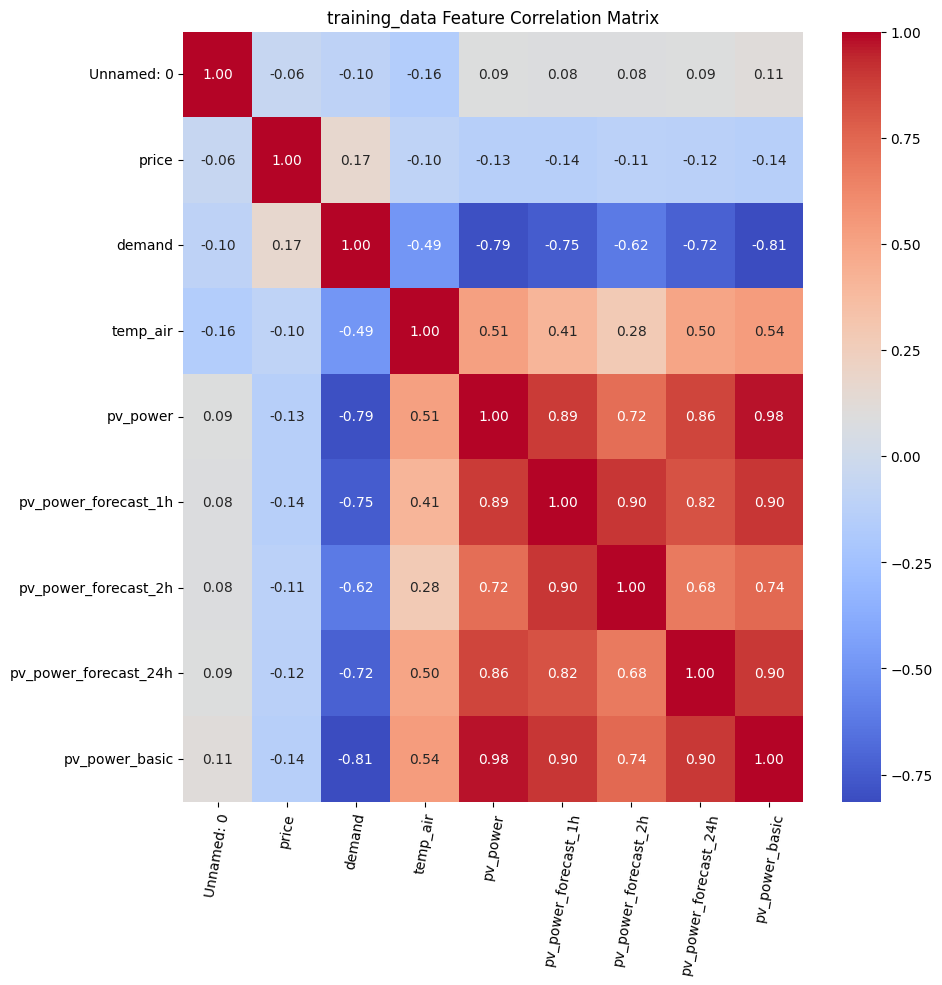

In [30]:
visualise_corr(train_data,"training_data")

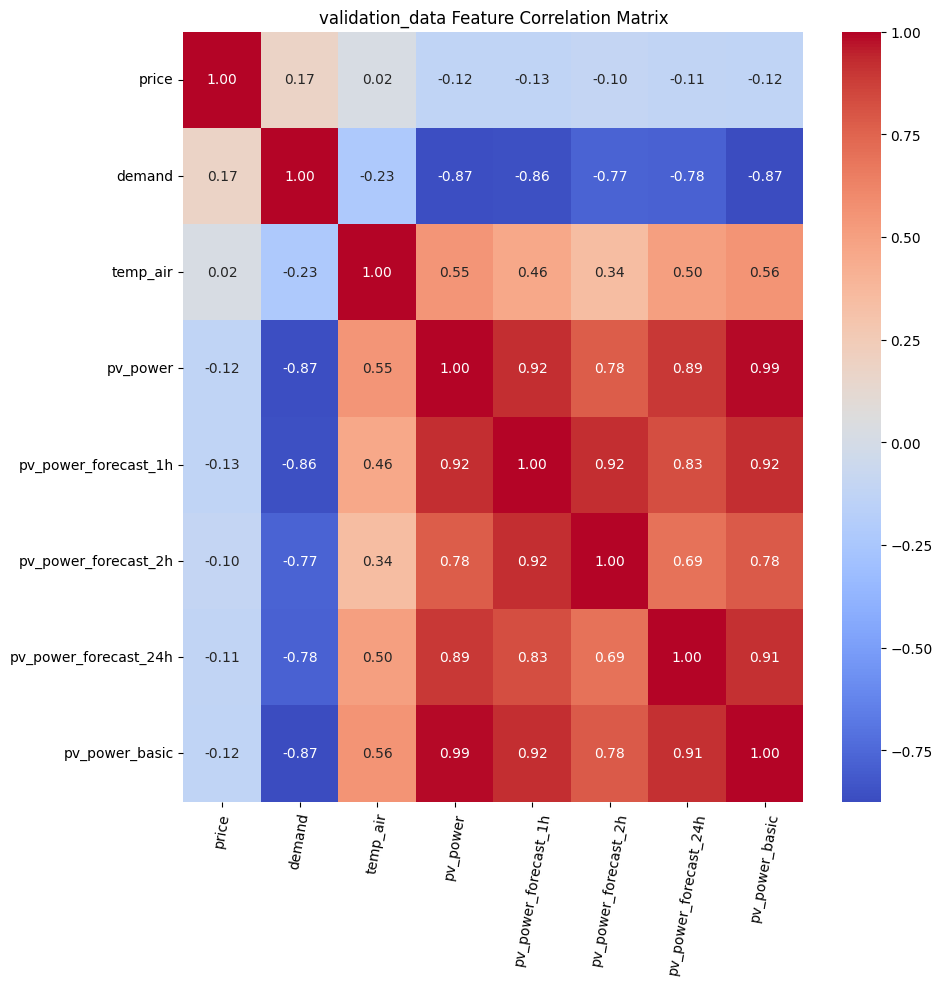

In [31]:
visualise_corr(valid_data,imgtitle="validation_data")

# Plot Yearly Trend

In [32]:
train_data['year'] = train_data['timestamp'].dt.year
train_data['month'] = train_data['timestamp'].dt.month
train_data['day'] = train_data['timestamp'].dt.day
valid_data['year'] = valid_data['timestamp'].dt.year
valid_data['month'] = valid_data['timestamp'].dt.month
valid_data['day'] = valid_data['timestamp'].dt.day

In [33]:
train_data['month'][0] ==12

C:\Users\b0350\AppData\Local\Temp\ipykernel_32376\2389180529.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_data['month'][0] ==12


False

In [34]:
train_data['price'].mean()

88.80700064964556

In [35]:
# get unique year vlaues
train_year_value = train_data['year'].unique()
print(f"training data years are: {train_year_value}")
valid_year_value = valid_data['year'].unique()
print(f"validation data years are: {valid_year_value}")

training data years are: [2023]
validation data years are: [2023]


In [36]:
train_data_per_year = dict()
for year in train_year_value:
    train_data_per_year[year] = train_data[train_data['year'] == year]

valid_data_per_year = dict()
for year in valid_year_value:
    valid_data_per_year[year] = valid_data[valid_data['year'] == year]


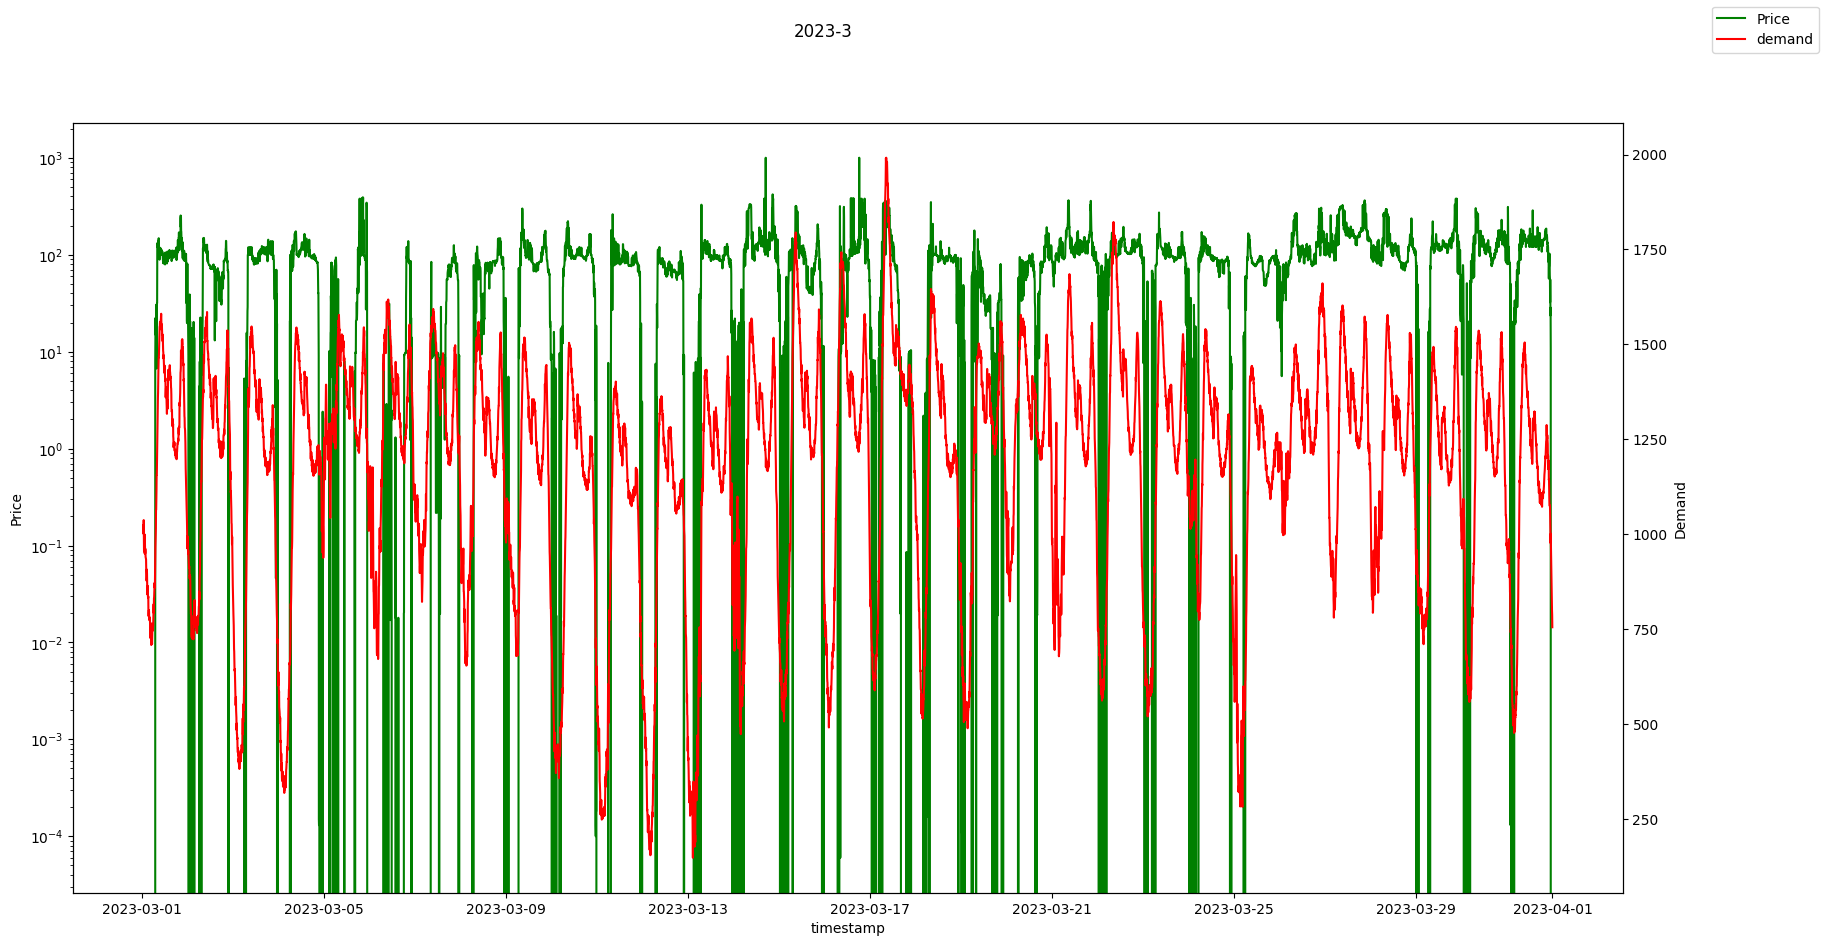

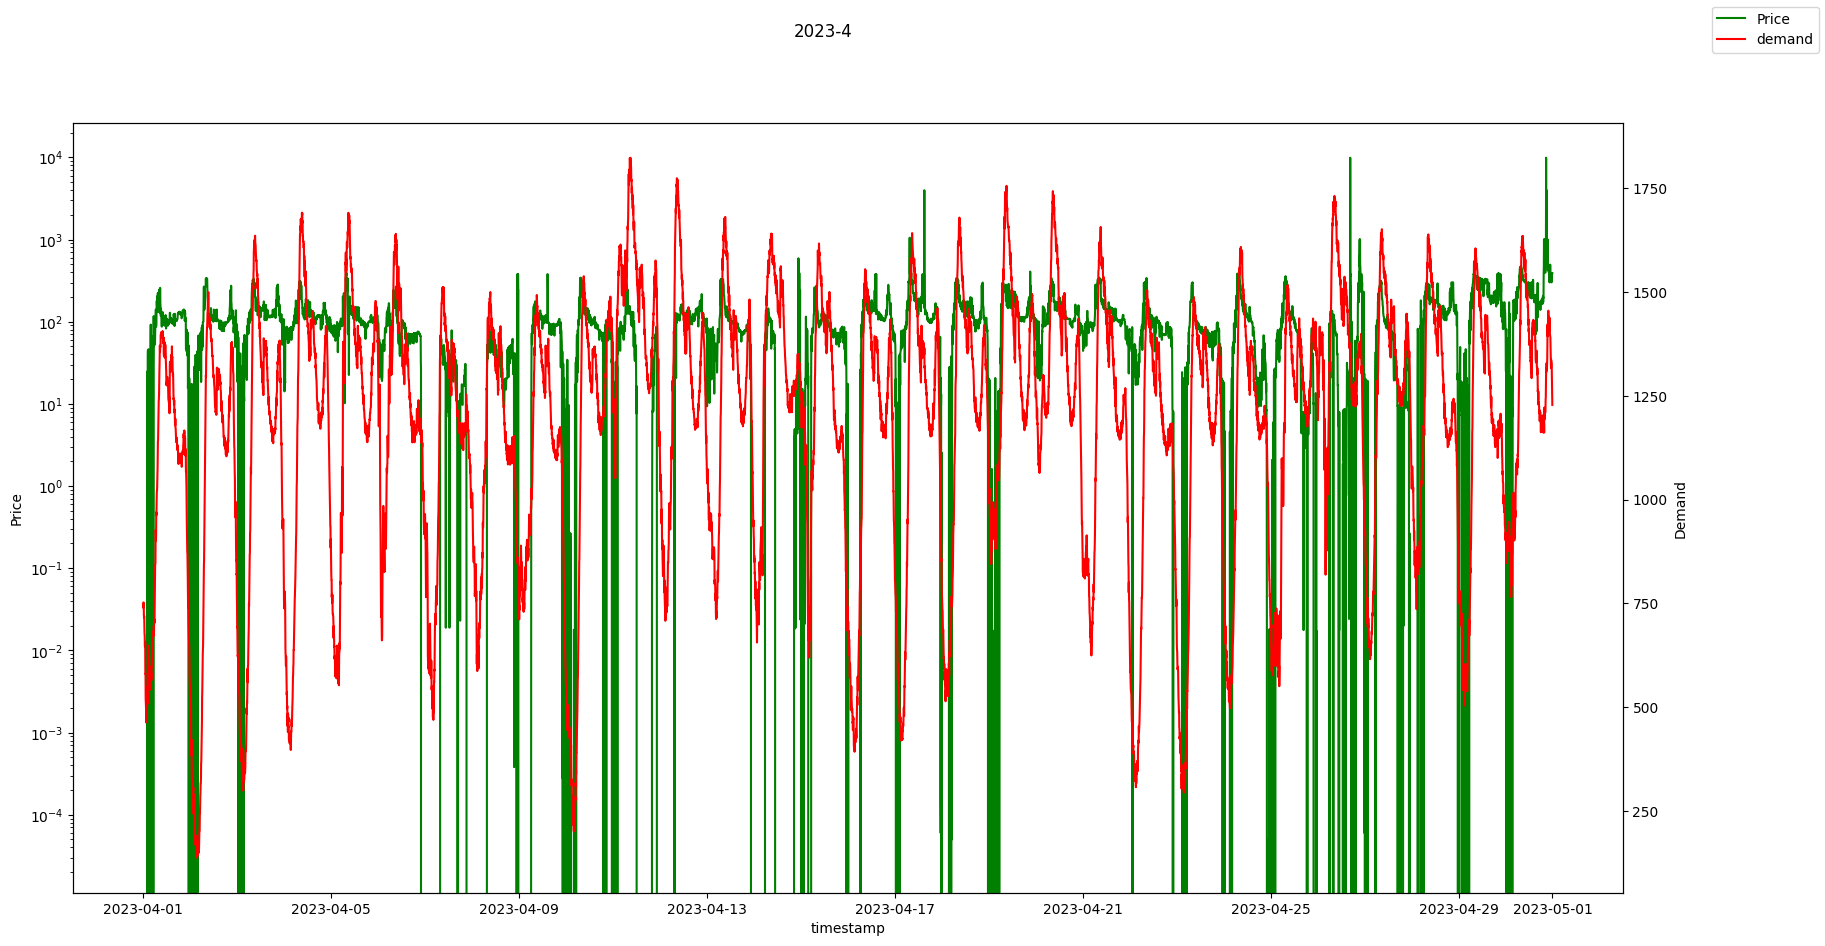

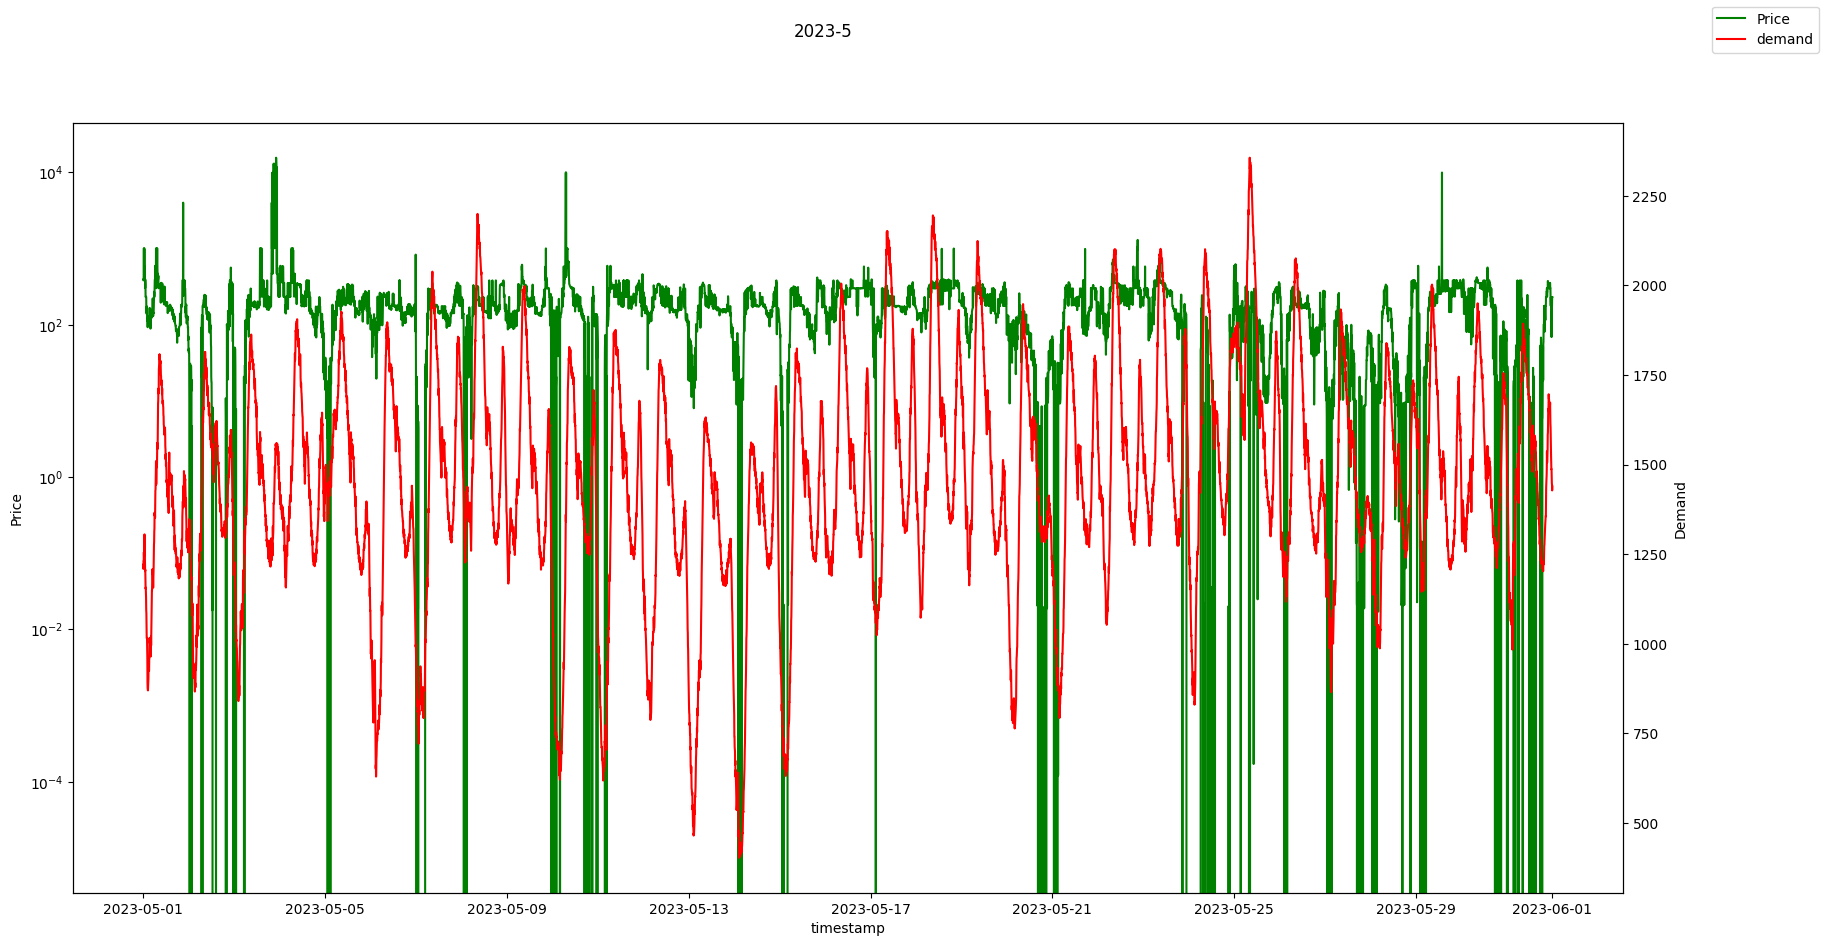

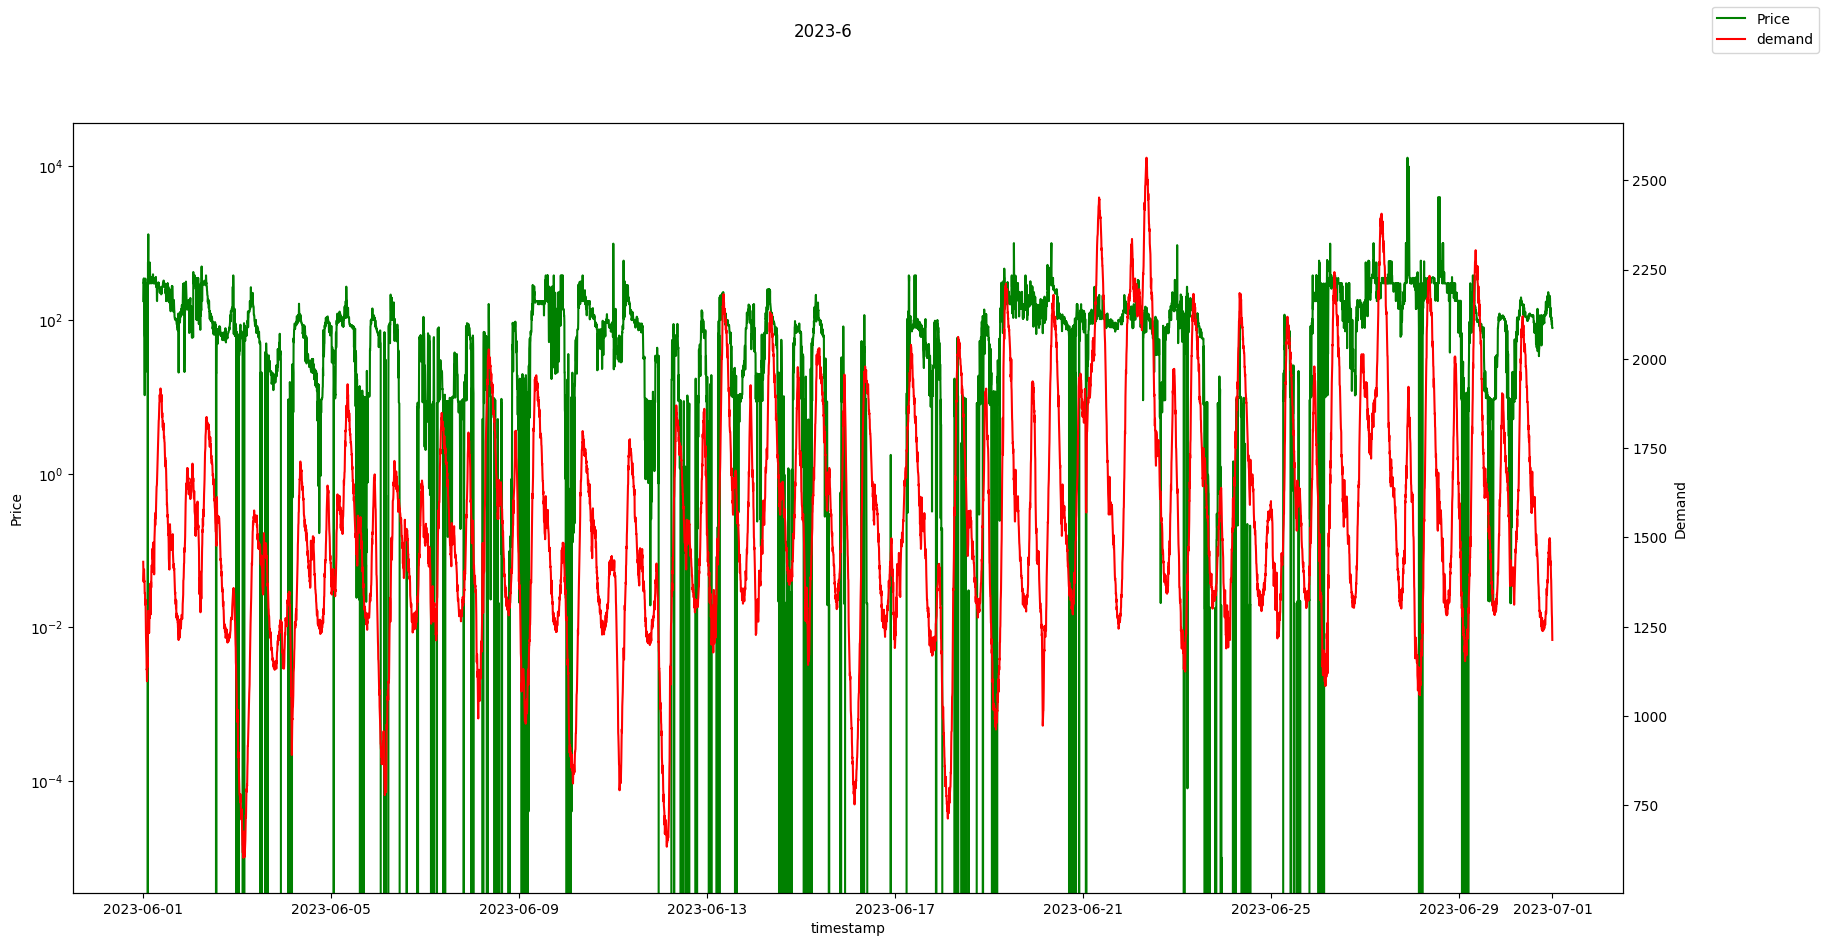

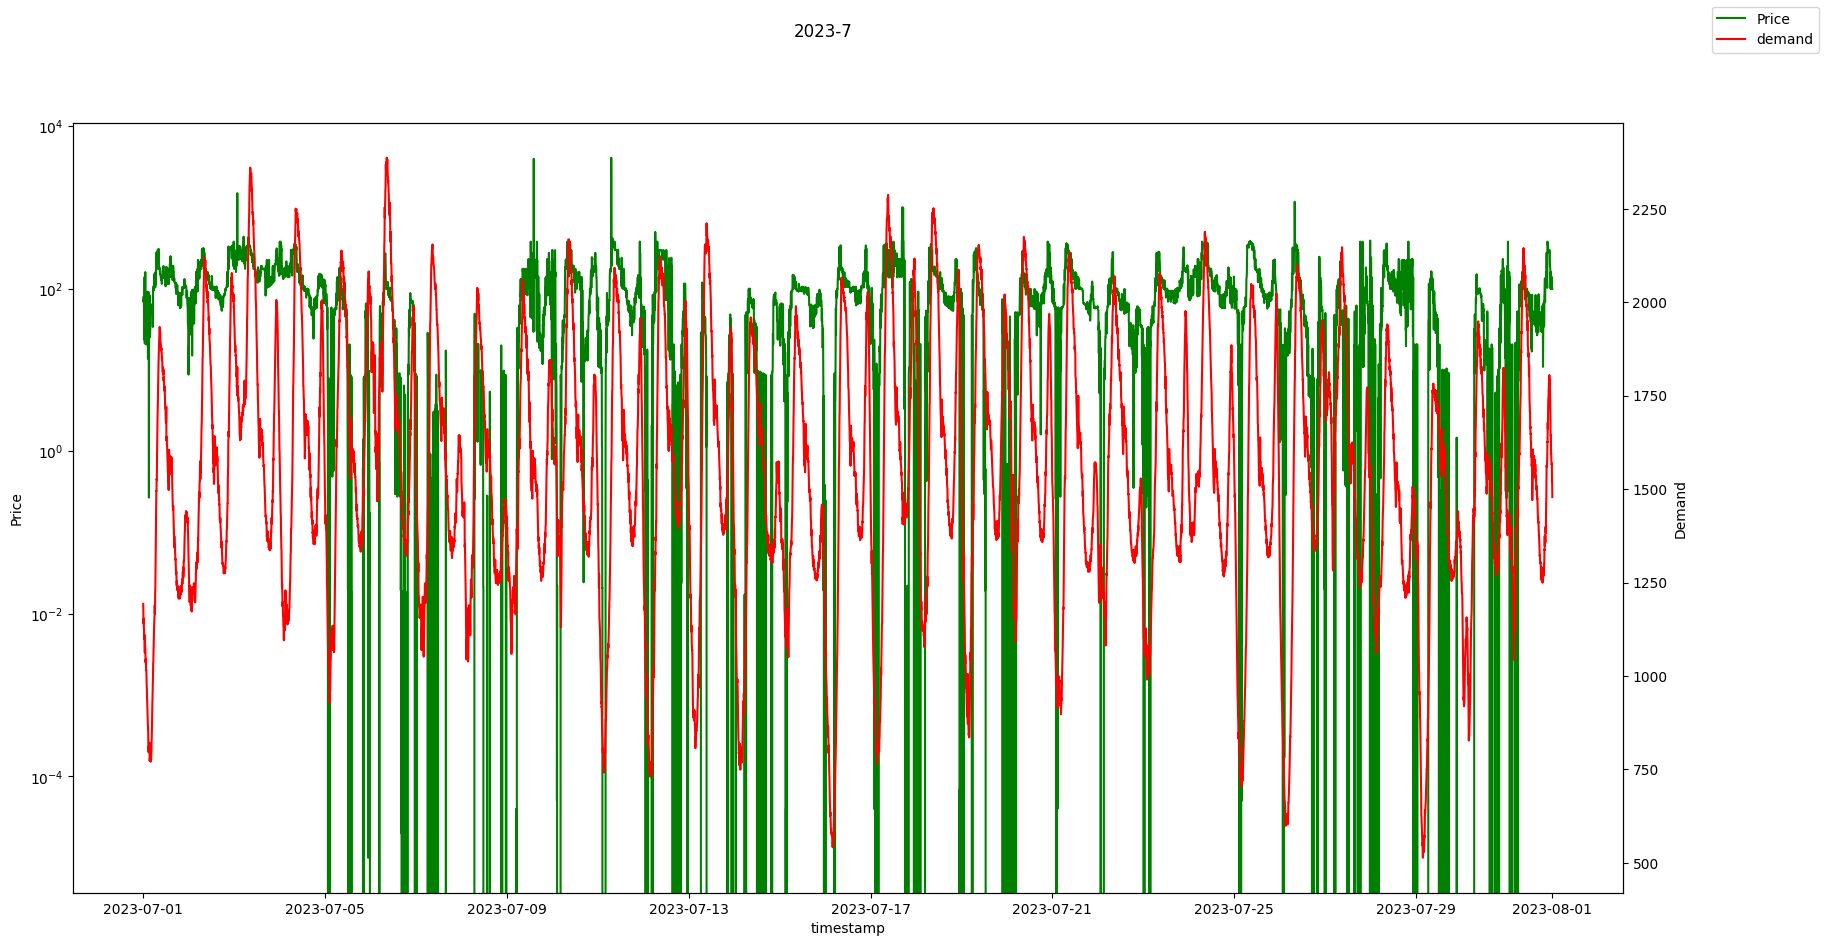

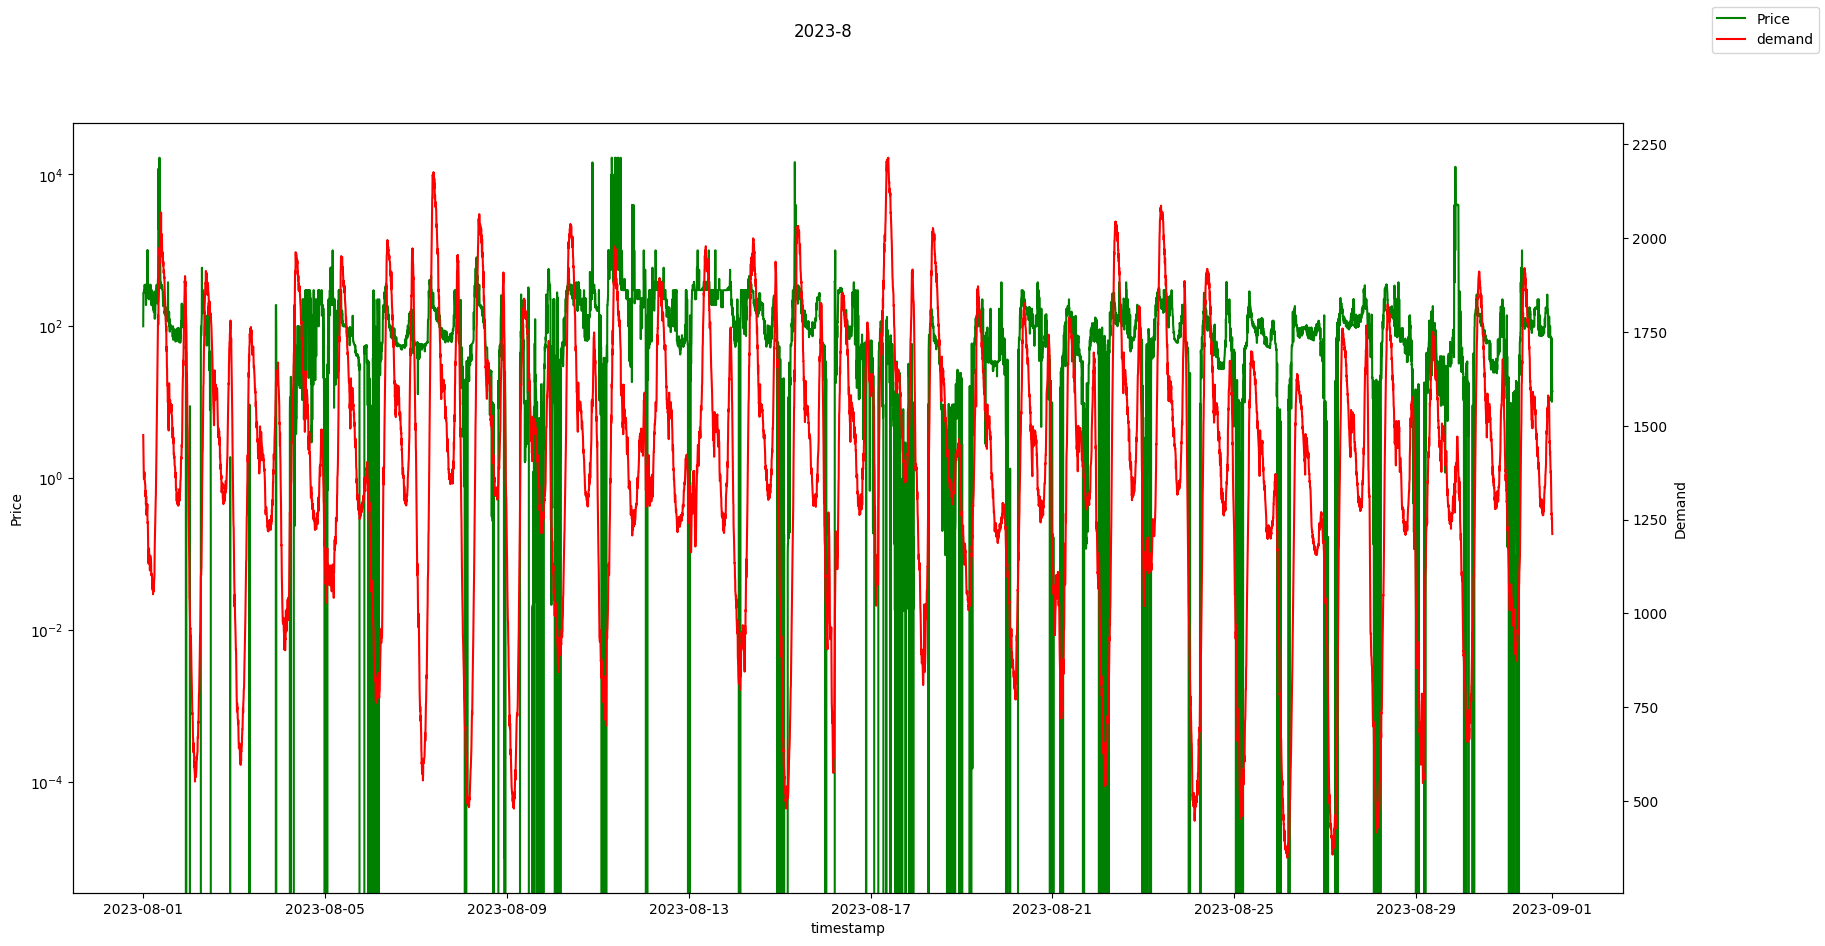

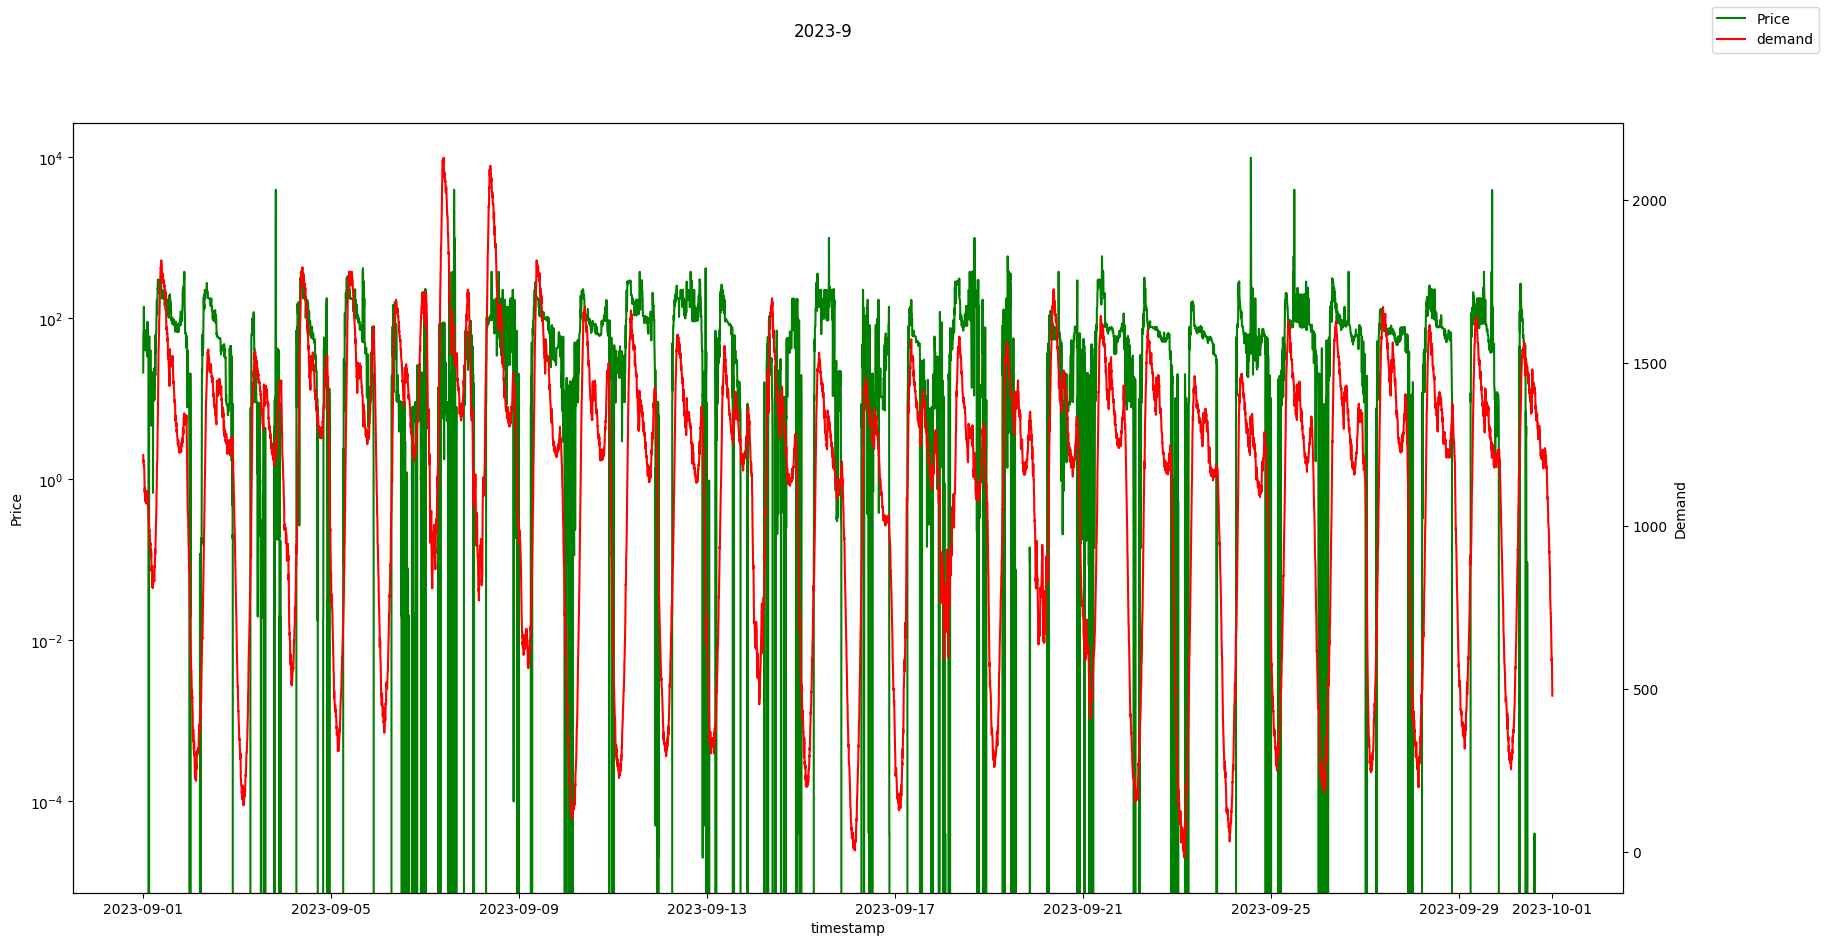

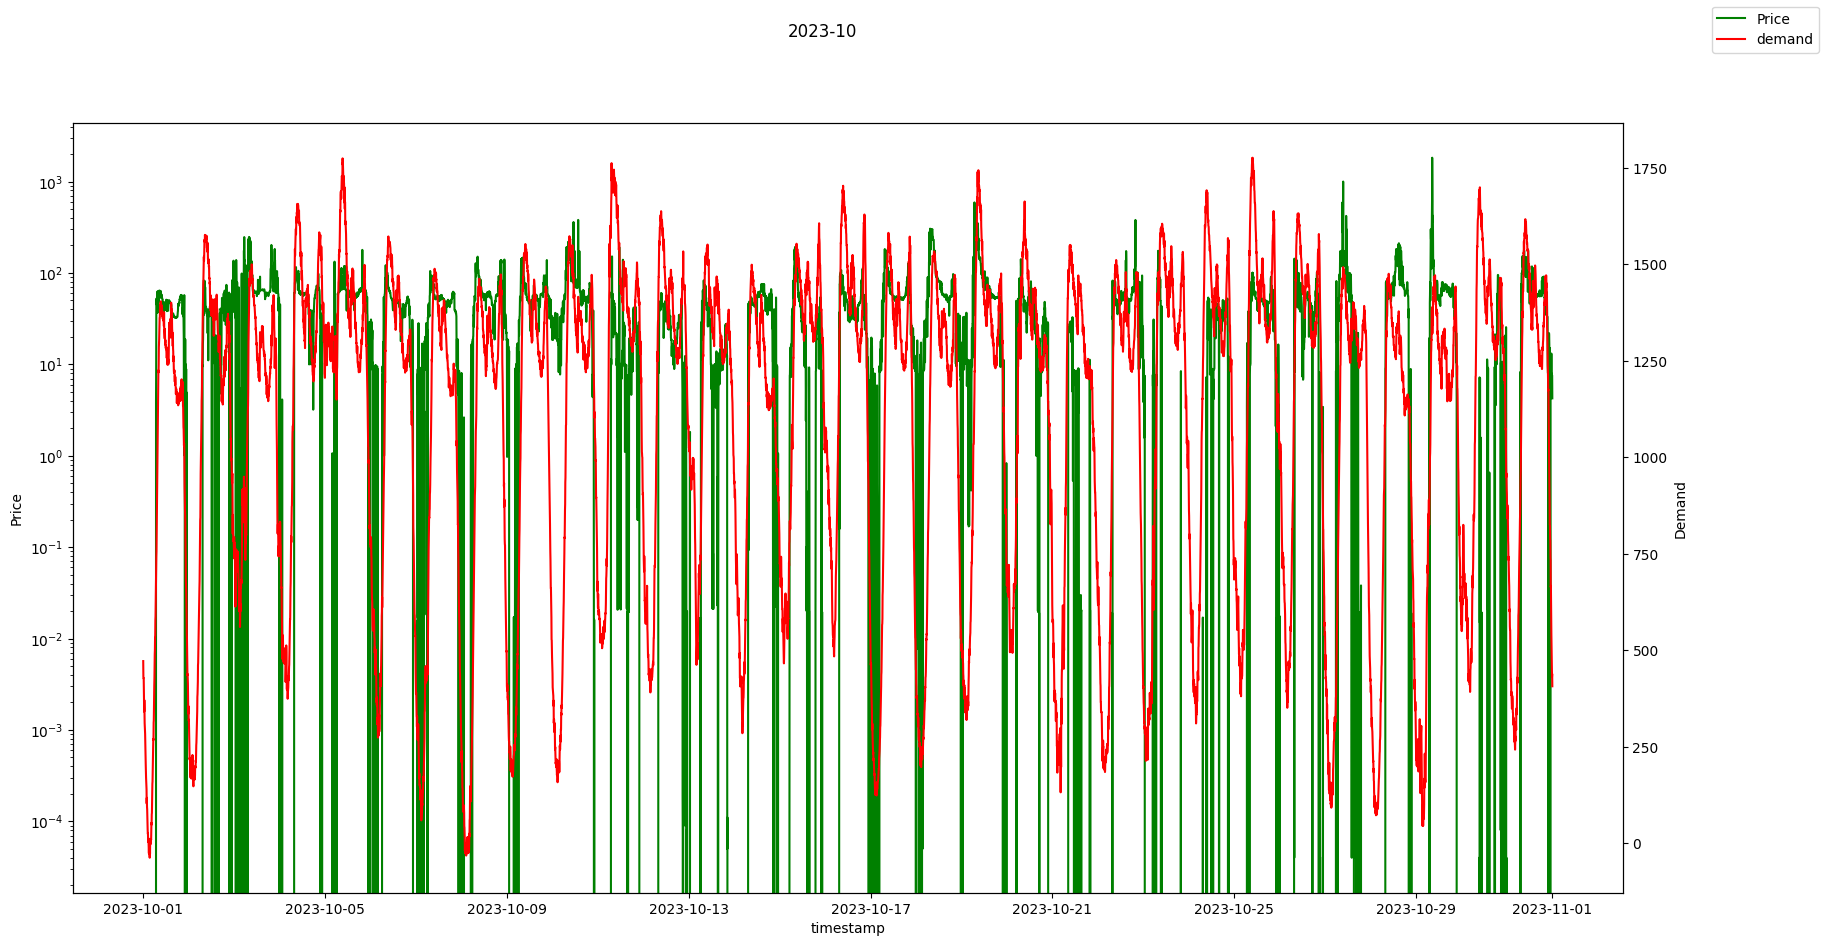

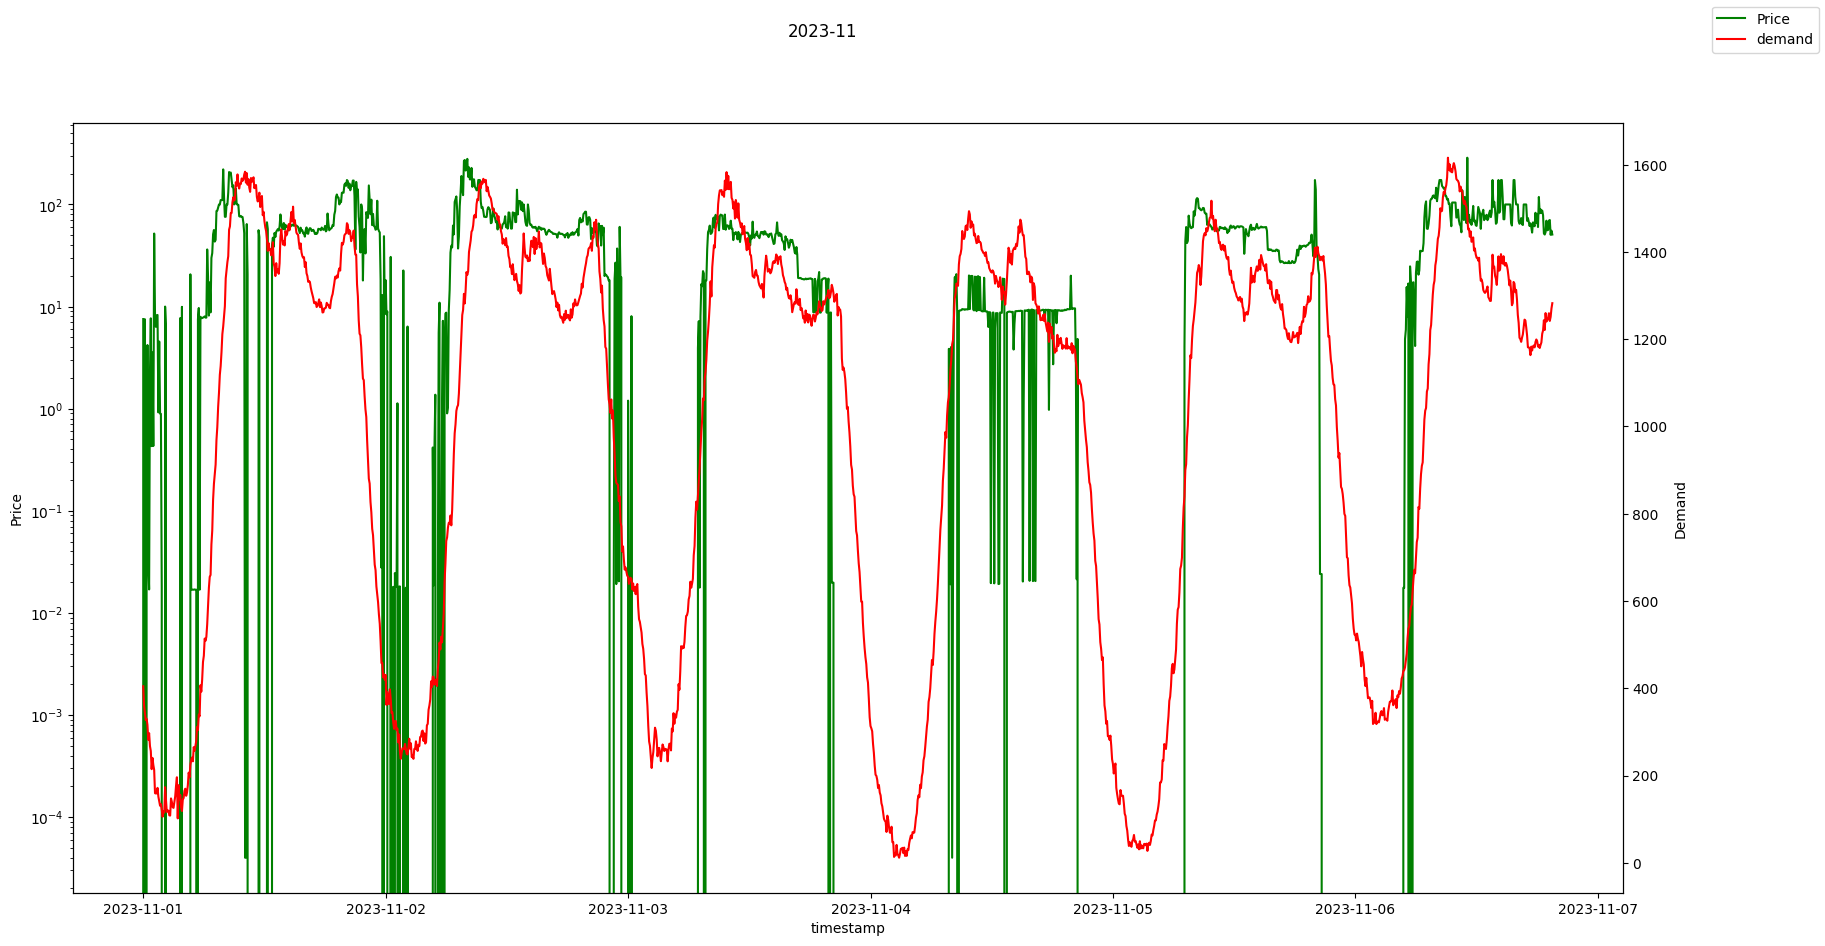

In [37]:
import copy
for year, df_year in train_data_per_year.items():
    month_unique = df_year['month'].unique()
    for i in month_unique:
        df = copy.deepcopy(df_year)
        df = df[df['month']==i]
        df['price']
        #df.plot(x='timestamp', y=['pv_power', 'demand', 'price'], secondary_y='pv_power', figsize=(20, 10))
        fig, ax1 = plt.subplots(figsize=(20,10))
        ax2 = ax1.twinx()
        #plt.figure(figsize=(20, 6))
        ax1.plot(df['timestamp'], df['price'], label='Price', color = 'g')
        
        #ax1.set_ylim([df['price'].min(),0.5*(df['price'].mean()+df['price'].max())])
        #ax1.set_ylim([df['price'].min(),500])
        ax2.plot(df['timestamp'], df['demand'], label='demand', color= 'r')
        ax1.set_xlabel("timestamp")
        ax1.set_ylabel("Price")
        ax1.set_yscale("log")
        ax2.set_ylabel("Demand")
        #ax1.legend(loc="upper right")
        #ax2.legend(loc="right")
        fig.legend(loc="upper right")
        fig.suptitle(f"{year}-{i}")

        #plt.yscale("log")
        #plt.xlabel('timestamp')
        #plt.ylabel('Price')
        #plt.legend()
        #plt.title(f'{year} - training data Price')
        plt.show()
        plt.close()
    

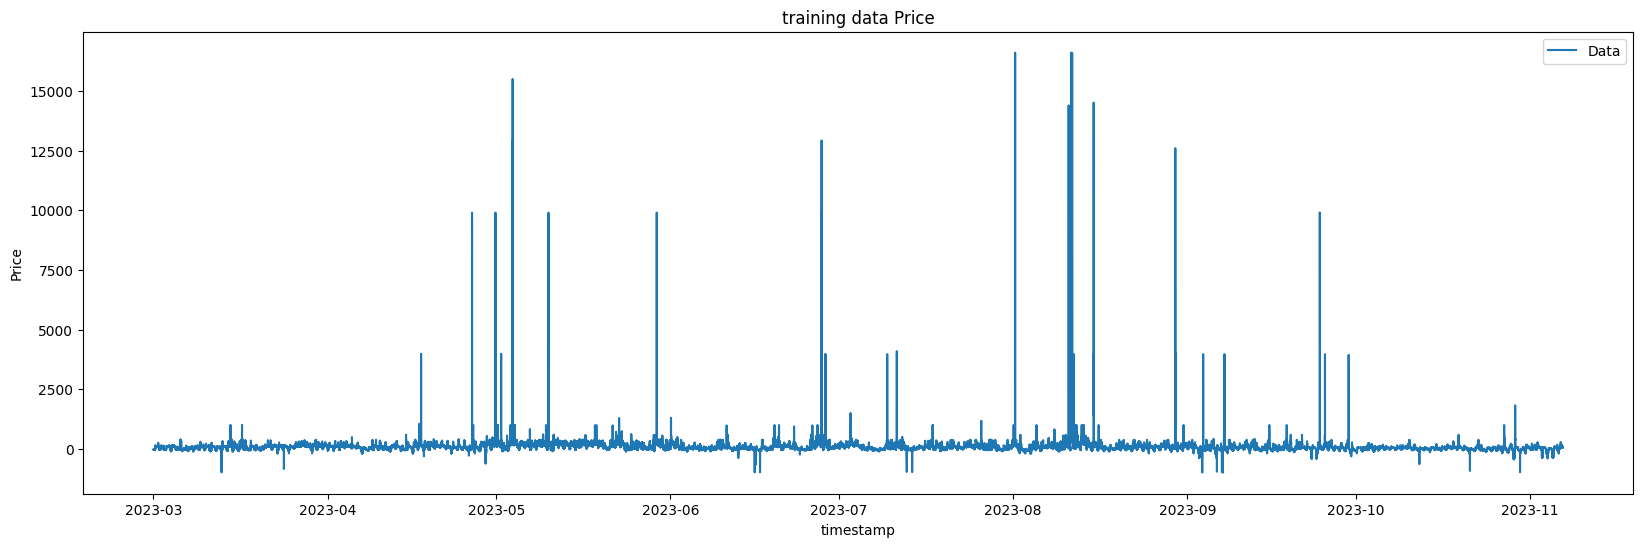

In [38]:
#Plot year by year trend
plt.figure(figsize=(20, 6))
plt.plot(train_data['timestamp'], train_data['price'], label='Data')
plt.xlabel('timestamp')
plt.ylabel('Price')
plt.legend()
plt.title('training data Price')
plt.show()

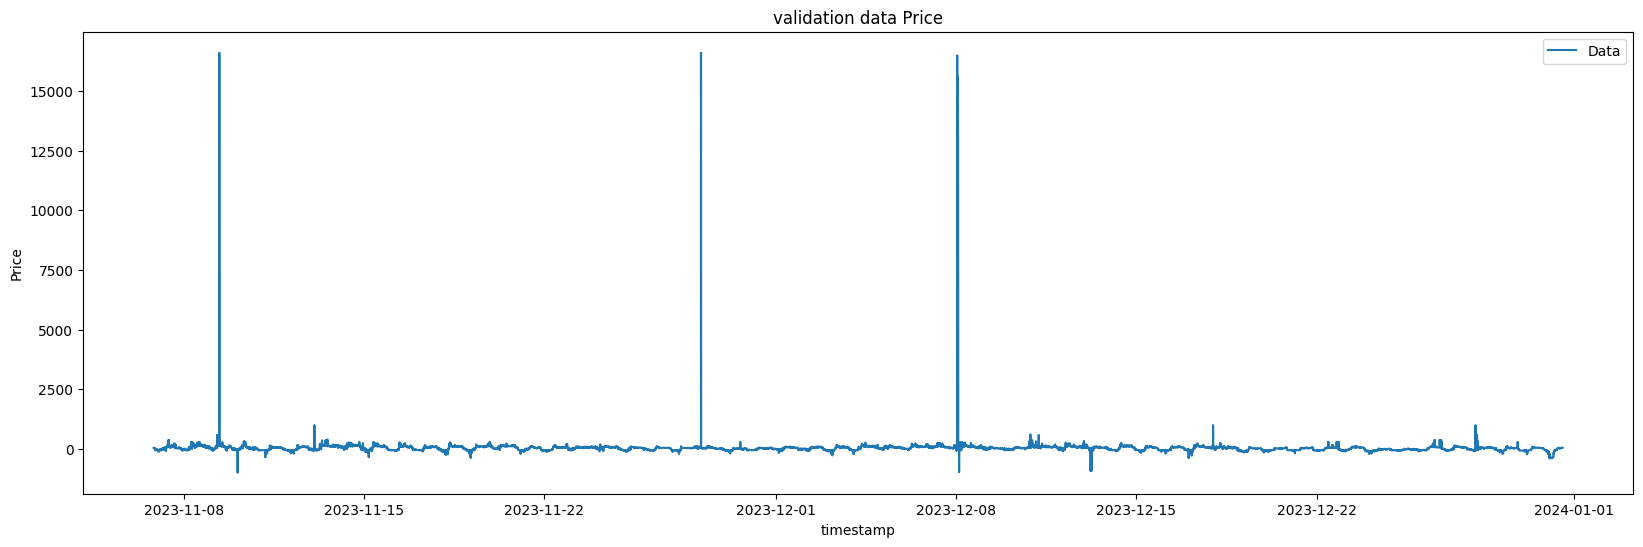

In [39]:
plt.figure(figsize=(20, 6))
plt.plot(valid_data['timestamp'], valid_data['price'], label='Data')
plt.xlabel('timestamp')
plt.ylabel('Price')
plt.legend()
plt.title('validation data Price')
plt.show()

# Visualise the historical Data

In this block, I will plot the price, demand, and pv_power over the timeline for visualisation.

In [40]:
import datetime


In [41]:
def convert_str_to_datetime(datetime_str):
    '''
    This funciton is used to convert the string format datatime into datetime object.
    '''
    return datetime.datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")

In [42]:
#Convert the string format timestamp into datetime object.
#train_data['timestamp'] = train_data['timestamp'].apply(lambda x: convert_str_to_datetime(x))
#valid_data['timestamp'] = valid_data['timestamp'].apply(lambda x: convert_str_to_datetime(x))

In [43]:
#Set the timestamp as the index of the data
data = data.set_index("timestamp", drop=False) #do not drop the original column

NameError: name 'data' is not defined

In [ ]:
data_pdp_5min = data[['price','demand','pv_power']]
'''
data_pdp_5min:
    This is a dataframe that only contians 'price', 'demand' and 'pv_power'
    One record per 5 mins.
'''

In [ ]:
# [Optional] Vote the per 5 mins records to per hour records.
data_pdp_1hr = data_pdp_5min.resample('1h').mean()
##data_per_hour = data.resample('1h').agg(lambda x: derek_avg(x))

In [ ]:
data_pdp_1hr

,price,demand,pv_power
timestamp,,,
2021-01-01 00:00:00,35.315806,1210.665000,NaN
2021-01-01 01:00:00,21.278479,1097.352500,NaN
2021-01-01 02:00:00,8.468474,1055.209167,NaN
2021-01-01 03:00:00,8.363678,1037.480000,NaN
2021-01-01 04:00:00,8.770794,1027.701667,NaN
...,...,...,...
2023-11-06 16:00:00,39.449132,866.436667,0.0
2023-11-06 17:00:00,98.130826,1214.190833,0.0
2023-11-06 18:00:00,146.972941,1478.198333,0.0


In [ ]:
data

,timestamp,price,demand,demand_total,station_id,temp_air,temp_min,temp_max,exports,imports,pv_power,pv_power_forecast_1h,pv_power_forecast_2h,pv_power_forecast_24h,pv_power_basic,pv_power_basic_forecast_1h,pv_power_basic_forecast_2h,pv_power_basic_forecast_24h,dni,ghi
timestamp,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,2021-01-01 00:00:00,32.30093,1234.03,1486.99764,23000,26.3,26.3,26.3,0.00000,53.50945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
2021-01-01 00:05:00,2021-01-01 00:05:00,37.23402,1231.68,1495.32122,23000,26.3,26.3,26.3,0.00000,90.34554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
2021-01-01 00:10:00,2021-01-01 00:10:00,36.67139,1240.71,1503.79835,23000,26.3,26.3,26.3,0.00000,82.53181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
2021-01-01 00:15:00,2021-01-01 00:15:00,36.03389,1224.78,1471.57561,23000,26.3,26.3,26.3,0.00000,116.01917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
2021-01-01 00:20:00,2021-01-01 00:20:00,34.92372,1211.59,1464.35183,23000,26.3,26.3,26.3,0.00000,83.06683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06 19:40:00,2023-11-06 19:40:00,104.44000,1595.88,1602.23000,23000,10.7,10.7,10.7,204.53361,0.00000,0.0,0.026,2.301,0.0,0.000000,15925.833787,378349.520325,0.000000,0,0
2023-11-06 19:45:00,2023-11-06 19:45:00,104.44000,1603.58,1610.18000,23000,10.7,10.7,10.7,216.46358,0.00000,0.0,0.026,2.301,0.0,0.000000,15925.833787,378349.520325,0.000000,0,0
2023-11-06 19:50:00,2023-11-06 19:50:00,104.44000,1596.40,1603.18000,23000,10.7,10.7,10.7,186.09243,0.00000,0.0,0.026,2.301,0.0,0.000000,15925.833787,378349.520325,0.000000,0,0


In [10]:
history = pd.DataFrame(columns=['timestamp','price','demand','temp_air','pv_power'])

In [15]:
#history = pd.concat([history,{'timestamp': 'adfas', 'price': 12, 'demand':12, 'temp_air': 98, 'pv_power':10}])

history = pd.concat([history,['d',1,2,3,4]])

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

: 